In [298]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random

In [299]:
# Relative Volatilities
alpha_A=2.4
alpha_B=1
alpha_C=0.21

In [326]:
# Number of Molecules
N=10000

In [313]:
#Mole Fraction
x_A=0.85
x_B=0.12
x_C=0.03

In [312]:
def expect(alpha,M):
    return alpha*M

In [335]:
#Initiallizing Loop
m=220
n=39
A=np.zeros((m+1,n+1))
B=np.zeros((m+1,n+1))
C=np.zeros((m+1,n+1))
x_axis=[val/(m+1) for val in range(m+1)]
A[0][0]=N*x_A
B[0][0]=N*x_B
C[0][0]=N*x_C
for i in range(m):
    for j in range(n):
        r=np.random.uniform(0,1)
        # if(i<3 and j<3): print(r)
        val_A=expect(alpha_A,A[i][0])
        val_B=expect(alpha_B,B[i][0])
        val_C=expect(alpha_C,C[i][0])
        val_sum=max(val_A,val_B,val_C);
        if(val_A/val_sum>=r):
            A[i][j+1]=A[i][j]-1
        else:
            A[i][j+1]=A[i][j]
        if(val_B/val_sum>=r):
            B[i][j+1]=B[i][j]-1
        else:
            B[i][j+1]=B[i][j]
        if(val_C/val_sum>=r):
            C[i][j+1]=C[i][j]-1
        else:
            C[i][j+1]=C[i][j]
    A[i+1][0]=A[i][n]
    B[i+1][0]=B[i][n]
    C[i+1][0]=C[i][n]


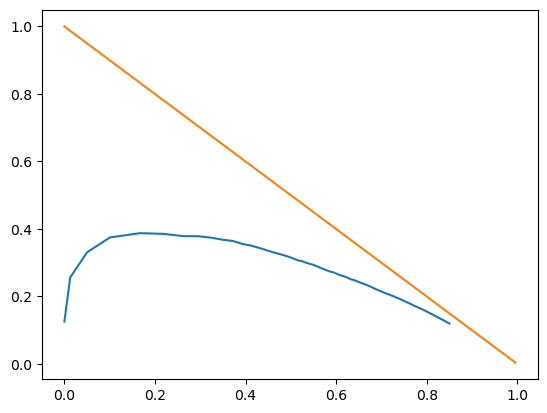

In [402]:
x_A_final=np.zeros(m+1)
x_B_final=np.zeros(m+1)
X_C_final=np.zeros(m+1)
x_axis=np.arange(0,1,1/(m+1))
for i in range(m+1):
    x_A_final[i]=A[i][0]/(A[i][0]+B[i][0]+C[i][0])
    # print(A[i][n]/(A[i][n]+B[i][n]+C[i][n]))
    x_B_final[i]=B[i][0]/(A[i][0]+B[i][0]+C[i][0])
    # print(i)
x_C_final=1-x_A_final-x_B_final
plt.plot(x_A_final,x_B_final)
plt.plot(x_axis,1-x_axis)
# plt.plot(x_axis,x_B_final)
plt.show()

In [403]:
x_B_final

array([0.12      , 0.1202932 , 0.12058883, 0.12097591, 0.12145543,
       0.12175954, 0.12215618, 0.12246578, 0.12260932, 0.12310567,
       0.12314911, 0.12348136, 0.1239878 , 0.12440596, 0.12473483,
       0.12506658, 0.12540124, 0.12564488, 0.1259851 , 0.12651778,
       0.12705498, 0.12731051, 0.12747253, 0.12792494, 0.12839561,
       0.12875919, 0.1291261 , 0.1294964 , 0.12996838, 0.13016341,
       0.1304447 , 0.13092784, 0.13141542, 0.13200786, 0.1322026 ,
       0.13250058, 0.13249619, 0.13290094, 0.13293016, 0.13313468,
       0.13323748, 0.13386301, 0.13428502, 0.13481644, 0.13514174,
       0.13557657, 0.13613922, 0.13669065, 0.13672655, 0.13696225,
       0.13741805, 0.1378786 , 0.1384537 , 0.13903469, 0.13962167,
       0.13988095, 0.13993752, 0.14031414, 0.14103407, 0.1411936 ,
       0.14146926, 0.14197779, 0.14214565, 0.14289581, 0.1431877 ,
       0.14348302, 0.14380165, 0.14457831, 0.14500627, 0.14555898,
       0.14625898, 0.14694629, 0.14741945, 0.14812159, 0.14858

In [404]:
s=220
ep=np.arange(0,1,1/(s+1))
x=np.zeros((s+1,3))
x[0][0]=0.85;x[0][1]=0.12;x[0][2]=0.03
delta=0.05
alpha=[2.4,1,0.21]
for k in range(s):
    ep[k+1]=delta+ep[k];
    for i in range(3):
        x[k+1][i]=x[k][i]+delta*(x[k][i]-expect(alpha[i],x[k][i])/(expect(alpha_A,x[k][0])+expect(alpha_B,x[k][1])+expect(alpha_C,x[k][2])))

In [405]:
# Euler integration
x_a=np.zeros(s+1)
x_b=np.zeros(s+1)
x_c=np.zeros(s+1)
for i in range(s+1):
    x_a[i]=x[i][0]
    x_b[i]=x[i][1]
    x_c[i]=x[i][2]
np.shape(x_B_final)

(221,)

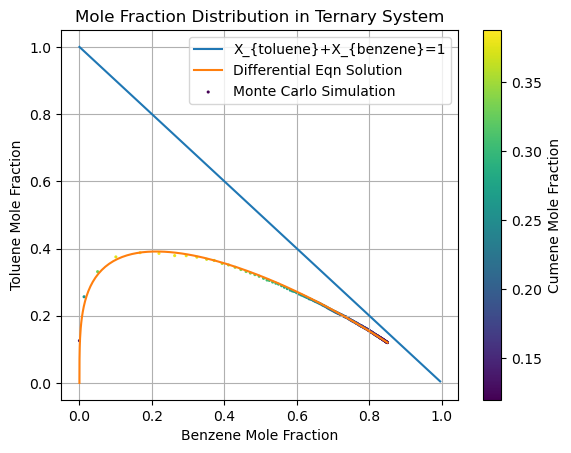

In [406]:
plt.plot(x_axis,1-x_axis,label="X_{toluene}+X_{benzene}=1")
plt.plot(x_a,x_b,label="Differential Eqn Solution")
plt.scatter(x_A_final,x_B_final,c=x_B_final,cmap='viridis',s=1.5,label="Monte Carlo Simulation")
plt.colorbar(label='Cumene Mole Fraction')
plt.xlabel('Benzene Mole Fraction')
plt.ylabel('Toluene Mole Fraction')
plt.title('Mole Fraction Distribution in Ternary System')
plt.legend()
plt.grid(True)

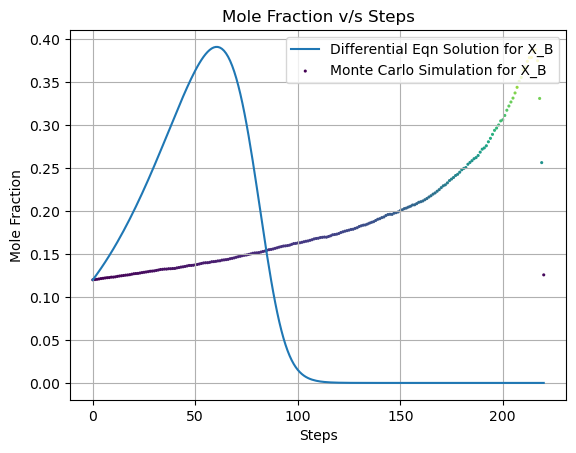

In [407]:
columns=np.arange(0,221,1)
columns2=np.arange(0,221,1)
# plt.plot(x_axis,1-x_axis,label="X_{toluene}+X_{benzene}=1")
plt.plot(columns2,x_b,label="Differential Eqn Solution for X_B")
plt.scatter(columns,x_B_final,c=x_B_final,cmap='viridis',s=1.5,label="Monte Carlo Simulation for X_B")
# plt.colorbar(label='Mole Fraction v/s Steps')
plt.xlabel('Steps')
plt.ylabel('Mole Fraction')
plt.title('Mole Fraction v/s Steps')
plt.legend()
plt.grid(True)

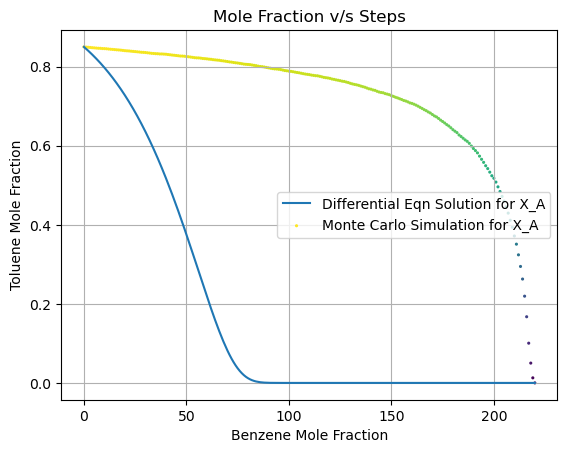

In [427]:
columns=np.arange(0,221,1)
columns2=np.arange(0,221,1)
# plt.plot(x_axis,1-x_axis,label="X_{toluene}+X_{benzene}=1")
plt.plot(columns2,x_a,label="Differential Eqn Solution for X_A")
plt.scatter(columns,x_A_final,c=x_A_final,cmap='viridis',s=1.5,label="Monte Carlo Simulation for X_A")
# plt.colorbar(label='Mole Fraction v/s Steps')
plt.xlabel('Benzene Mole Fraction')
plt.ylabel('Toluene Mole Fraction')
plt.title('Mole Fraction v/s Steps')
plt.legend()
plt.grid(True)

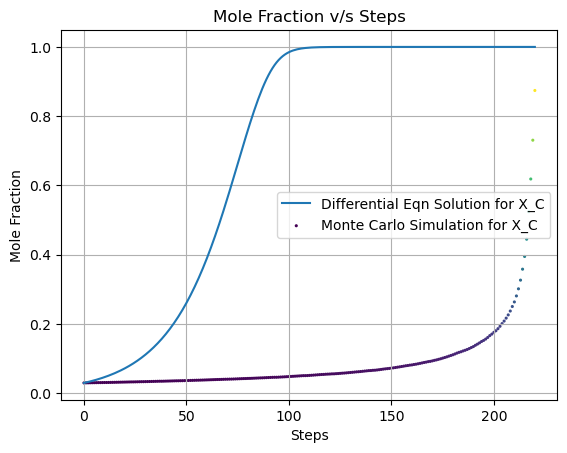

In [410]:
columns=np.arange(0,221,1)
columns2=np.arange(0,221,1)
# plt.plot(x_axis,1-x_axis,label="X_{toluene}+X_{benzene}=1")
plt.plot(columns2,x_c,label="Differential Eqn Solution for X_C")
plt.scatter(columns,x_C_final,c=x_C_final,cmap='viridis',s=1.5,label="Monte Carlo Simulation for X_C")
# plt.colorbar(label='Mole Fraction v/s Steps')
plt.xlabel('Steps')
plt.ylabel('Mole Fraction')
plt.title('Mole Fraction v/s Steps')
plt.legend()
plt.grid(True)

In [414]:
x_a-x_A_final

array([ 0.00000000e+00, -4.16818278e-03, -8.47064718e-03, -1.28252426e-02,
       -1.72349232e-02, -2.19622060e-02, -2.67524679e-02, -3.17830838e-02,
       -3.72341227e-02, -4.24102179e-02, -4.81921682e-02, -5.39698736e-02,
       -5.96567537e-02, -6.56109543e-02, -7.18378487e-02, -7.82530758e-02,
       -8.48611161e-02, -9.17569869e-02, -9.87644844e-02, -1.05795845e-01,
       -1.13036626e-01, -1.20766805e-01, -1.28809545e-01, -1.36799708e-01,
       -1.45110228e-01, -1.53652939e-01, -1.62431820e-01, -1.71450686e-01,
       -1.80618702e-01, -1.90412432e-01, -2.00268184e-01, -2.10186415e-01,
       -2.20359496e-01, -2.30693191e-01, -2.41671995e-01, -2.52815989e-01,
       -2.64515394e-01, -2.76087307e-01, -2.88512017e-01, -3.00805597e-01,
       -3.13458328e-01, -3.25868252e-01, -3.38728186e-01, -3.51732977e-01,
       -3.65178864e-01, -3.78755697e-01, -3.92555266e-01, -4.06464353e-01,
       -4.21190780e-01, -4.35796861e-01, -4.50366011e-01, -4.65086236e-01,
       -4.79831870e-01, -

In [415]:
x_b-x_B_final

array([ 0.        ,  0.0029371 ,  0.00594886,  0.00894741,  0.01193286,
        0.01517412,  0.01840428,  0.02180384,  0.02545273,  0.02883288,
        0.03275075,  0.03646526,  0.04009156,  0.04389256,  0.04786955,
        0.05193055,  0.05607552,  0.06039824,  0.06471077,  0.0689167 ,
        0.0732032 ,  0.07785547,  0.08268409,  0.08730362,  0.09198436,
        0.09684947,  0.10178597,  0.10679088,  0.11176254,  0.11707576,
        0.12236301,  0.12750383,  0.13269018,  0.13781559,  0.14337587,
        0.14886261,  0.15467318,  0.16008696,  0.16587866,  0.17148646,
        0.17717543,  0.18230801,  0.18759617,  0.19271149,  0.1979526 ,
        0.20298558,  0.20777236,  0.21243061,  0.21744158,  0.22206515,
        0.22625437,  0.23019607,  0.2337499 ,  0.23699201,  0.23988771,
        0.242734  ,  0.24536722,  0.24722389,  0.24823814,  0.24926942,
        0.24959535,  0.24905224,  0.24816591,  0.24596548,  0.24344413,
        0.24009409,  0.23585182,  0.23024253,  0.22403791,  0.21

In [426]:
[x_A_final,x_B_final]

[array([0.85      , 0.84958329, 0.84916314, 0.84865357, 0.84805366,
        0.84762196, 0.84709982, 0.84666049, 0.84647989, 0.84585842,
        0.84567258, 0.84530792, 0.84467347, 0.84412293, 0.84365719,
        0.84318739, 0.84271346, 0.84232588, 0.8418439 , 0.8411752 ,
        0.84050082, 0.84009625, 0.83978022, 0.83918322, 0.83867391,
        0.83815995, 0.83764127, 0.83711781, 0.83649503, 0.83624603,
        0.83580388, 0.83516609, 0.83452244, 0.83377644, 0.83341078,
        0.8329442 , 0.83276611, 0.8321934 , 0.83220681, 0.8318236 ,
        0.83153607, 0.83074515, 0.83014759, 0.82944323, 0.82893451,
        0.8283188 , 0.82769686, 0.82696601, 0.82684631, 0.82641415,
        0.82576904, 0.82511722, 0.82435359, 0.82358213, 0.82280273,
        0.82233437, 0.82218172, 0.82159686, 0.82068149, 0.82029906,
        0.81980303, 0.81908203, 0.81868354, 0.81772666, 0.8172043 ,
        0.81667579, 0.81625344, 0.81526104, 0.81459813, 0.81381339,
        0.81301959, 0.81210146, 0.81151982, 0.81